In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, x_test, Y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)

In [3]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, Y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

KNN

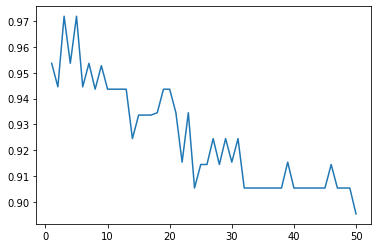

In [4]:
title = "Change K"
xlable = "K"
k_range = range(0, 51)
X = []
Y = []
error = []

for k in range(0, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    mean, std = cross_validation(knn)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

plt.plot(k_range, Y)
# plot(title, xlable, X, Y, error)
# plt.show()
# sn.lineplot(x=k_range, y=Y)

SVM

100%|██████████| 5/5 [00:00<00:00, 35.25it/s]


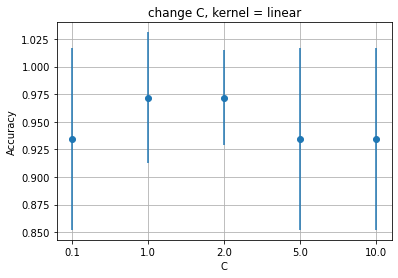

In [5]:
title = "change C, kernel = linear"
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    text_clf = svm.SVC(kernel='linear', C=C)
    mean, std = cross_validation(text_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

RF

100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


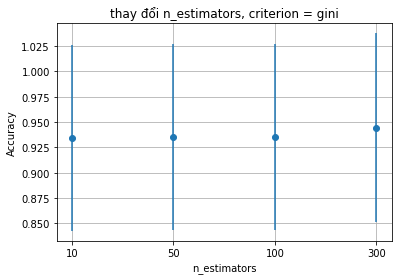

In [6]:
title = "thay đổi n_estimators, criterion = gini"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in tqdm([10, 50, 100, 300]):
    text_clf = RandomForestClassifier(criterion='gini', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

ANN

100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


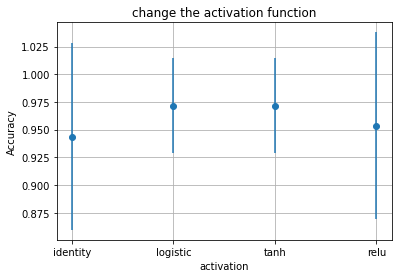

In [15]:
title = "change the activation function"
xlabel = "activation"
X = []
Y = []
error = []

for _activation in tqdm(['identity', 'logistic', 'tanh', 'relu']):
    ann_clf = MLPClassifier(max_iter=300, activation=_activation, hidden_layer_sizes=(100, 100))
    mean, std = cross_validation(ann_clf)
    X.append(str(_activation))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

Compare

In [18]:
_knn = KNeighborsClassifier(n_neighbors=4)
_svm = svm.SVC(kernel='linear', C=1.0)
_rf = RandomForestClassifier(criterion="gini", n_estimators=100)
_ann = MLPClassifier(max_iter=300, activation='tanh', hidden_layer_sizes=(100, 100))

_knn.fit(X_train, Y_train)
_svm.fit(X_train, Y_train)
_rf.fit(X_train, Y_train)
_ann.fit(X_train, Y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=300)

In [14]:
print(f'KNN: {accuracy_score(y_test, _knn.predict(x_test))}')
print(f'SVM: {accuracy_score(y_test, _svm.predict(x_test))}')
print(f'RF: {accuracy_score(y_test, _rf.predict(x_test))}')
print(f'ANN: {accuracy_score(y_test, _ann.predict(x_test))}')

KNN: 0.9777777777777777
SVM: 1.0
RF: 1.0
ANN: 1.0


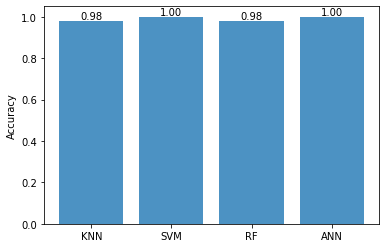

In [24]:
columns = ('KNN', 'SVM', 'RF', 'ANN')
data = [accuracy_score(y_test, _knn.predict(x_test)),
        accuracy_score(y_test, _svm.predict(x_test)),
        accuracy_score(y_test, _rf.predict(x_test)),
        accuracy_score(y_test, _ann.predict(x_test))]

fig, ax = plt.subplots()

x_pos = np.arange(len(columns))
ax.bar(x_pos, data, align='center', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(columns)
ax.set_ylabel('Accuracy')

for i, v in enumerate(data):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()